In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

In [27]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [28]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [29]:
#Create a list for holding the cities
cities = []
#Identify the nearest city for each coordinate set 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If city is unique, add it to the city list
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)

616

In [30]:
cities

['nikolskoye',
 'rikitea',
 'mar del plata',
 'ribeira grande',
 'east london',
 'kapaa',
 'puerto ayora',
 'pisco',
 'hithadhoo',
 'biak',
 'port elizabeth',
 'broome',
 'illoqqortoormiut',
 'olafsvik',
 'mataura',
 'jamestown',
 'new norfolk',
 'thompson',
 'atuona',
 'maku',
 'torbay',
 'lincoln',
 'lazaro cardenas',
 'ferrol',
 'fairbanks',
 'victoria',
 'lebu',
 'codrington',
 'bijar',
 'atambua',
 'ushuaia',
 'chuy',
 'tucuma',
 'kula',
 'tabiauea',
 'kodiak',
 'eureka',
 'cape town',
 'sao joao da barra',
 'walvis bay',
 'srednekolymsk',
 'svarstad',
 'provideniya',
 'bad durkheim',
 'richards bay',
 'siilinjarvi',
 'avarua',
 'taolanaro',
 'hermanus',
 'bethel',
 'tumannyy',
 'waipawa',
 'tasiilaq',
 'poum',
 'punta arenas',
 'hofn',
 'uchiza',
 'saldanha',
 'airai',
 'adelaide',
 'hot springs',
 'navahrudak',
 'staraya toropa',
 'iquitos',
 'nkayi',
 'bima',
 'aguimes',
 'hobart',
 'aklavik',
 'sentyabrskiy',
 'bluff',
 'roma',
 'kapit',
 'barrow',
 'katsuura',
 'hilo',
 'buba

In [31]:
#Starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key

In [35]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval   ")
print("-------------------------")

#Create counters
record_count = 1
set_count = 1


#Loop through the cities and build the city url
for i, city in enumerate(cities):
    
    
    
    #Group cities in sets of 50 for logging purposes
    #if i has no remainder when divided by 50, which means we have completed a set of 50, 
    #then increment main counter and increment set counter
    #so this if is executed after the 50th, 100th, etc pass, this is when we sleep for a minute
    if (i % 50 == 0 and i >= 50):  # % is the operator for modular arithmetic
        set_count += 1
        record_count = 1
        time.sleep(60)

    #Create an endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    #Add one to the record count
    record_count += 1
    
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the time to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M%S')
        #append the data into the city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    #if an error is experienced, skip the city    
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate that the Data Loading is complete
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval   
-------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | biak
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | broome
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | olafsvik
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | maku
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 | lincoln
Processin

Processing Record 43 of Set 4 | half moon bay
Processing Record 44 of Set 4 | banda aceh
Processing Record 45 of Set 4 | zhangye
Processing Record 46 of Set 4 | dicabisagan
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | cesis
Processing Record 49 of Set 4 | zhigansk
Processing Record 50 of Set 4 | najran
Processing Record 1 of Set 5 | ulladulla
Processing Record 2 of Set 5 | narok
Processing Record 3 of Set 5 | edson
Processing Record 4 of Set 5 | peniche
Processing Record 5 of Set 5 | grimshaw
Processing Record 6 of Set 5 | haines junction
Processing Record 7 of Set 5 | ahuimanu
Processing Record 8 of Set 5 | cabo san lucas
Processing Record 9 of Set 5 | mahebourg
Processing Record 10 of Set 5 | horsham
Processing Record 11 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 12 of Set 5 | muzhi
Processing Record 13 of Set 5 | autazes
Processing Record 14 of Set 5 | vestmanna
Processing Record 15 of Set 5 | dongning
Processing Record 16 of Set 5 |

Processing Record 32 of Set 8 | kruisfontein
Processing Record 33 of Set 8 | inhambane
Processing Record 34 of Set 8 | victor harbor
Processing Record 35 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 36 of Set 8 | foumbot
Processing Record 37 of Set 8 | necochea
Processing Record 38 of Set 8 | baruun-urt
Processing Record 39 of Set 8 | port hedland
Processing Record 40 of Set 8 | sitka
Processing Record 41 of Set 8 | longhua
Processing Record 42 of Set 8 | ikalamavony
Processing Record 43 of Set 8 | ambilobe
Processing Record 44 of Set 8 | nisia floresta
Processing Record 45 of Set 8 | hillsborough
Processing Record 46 of Set 8 | gandiaye
Processing Record 47 of Set 8 | vila do maio
Processing Record 48 of Set 8 | saleaula
City not found. Skipping...
Processing Record 49 of Set 8 | san jeronimo
Processing Record 50 of Set 8 | tokur
Processing Record 1 of Set 9 | beruwala
Processing Record 2 of Set 9 | luanda
Processing Record 3 of Set 9 | diego de almagro
Processin

Processing Record 19 of Set 12 | batticaloa
Processing Record 20 of Set 12 | nome
Processing Record 21 of Set 12 | omsukchan
Processing Record 22 of Set 12 | varkkallai
Processing Record 23 of Set 12 | caravelas
Processing Record 24 of Set 12 | eregli
Processing Record 25 of Set 12 | paita
Processing Record 26 of Set 12 | santa cruz de tenerife
Processing Record 27 of Set 12 | rome
Processing Record 28 of Set 12 | marsa matruh
Processing Record 29 of Set 12 | kuldur
Processing Record 30 of Set 12 | olavarria
Processing Record 31 of Set 12 | hualmay
Processing Record 32 of Set 12 | imeni poliny osipenko
Processing Record 33 of Set 12 | ranau
Processing Record 34 of Set 12 | halifax
Processing Record 35 of Set 12 | thunder bay
Processing Record 36 of Set 12 | gorontalo
Processing Record 37 of Set 12 | saint joseph
Processing Record 38 of Set 12 | el badari
City not found. Skipping...
Processing Record 39 of Set 12 | puksoozero
Processing Record 40 of Set 12 | meridian
Processing Record 4

In [36]:
len(city_data)

570

In [38]:
#Convert the array of dictionaries to a pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,31.89,98,71,5.70,RU,2021-12-17 18:2137
1,Rikitea,-23.1203,-134.9692,74.68,73,99,18.03,PF,2021-12-17 18:2137
2,Mar Del Plata,-38.0023,-57.5575,68.88,88,86,20.00,AR,2021-12-17 18:2026
3,Ribeira Grande,38.5167,-28.7000,59.40,58,40,13.80,PT,2021-12-17 18:2138
4,East London,-33.0153,27.9116,63.54,67,20,9.22,ZA,2021-12-17 18:2138


In [39]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]


In [40]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2021-12-17 18:2137,59.7035,30.7861,31.89,98,71,5.70
1,Rikitea,PF,2021-12-17 18:2137,-23.1203,-134.9692,74.68,73,99,18.03
2,Mar Del Plata,AR,2021-12-17 18:2026,-38.0023,-57.5575,68.88,88,86,20.00
3,Ribeira Grande,PT,2021-12-17 18:2138,38.5167,-28.7000,59.40,58,40,13.80
4,East London,ZA,2021-12-17 18:2138,-33.0153,27.9116,63.54,67,20,9.22


In [41]:
#Create the output file (CSV format)
output_data_file = "weather_data/cities.csv"
#Export the city data into a csv
city_data_df.to_csv(output_data_file,index_label = "City_ID")

In [42]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## Plot latitude vs Max Temperature

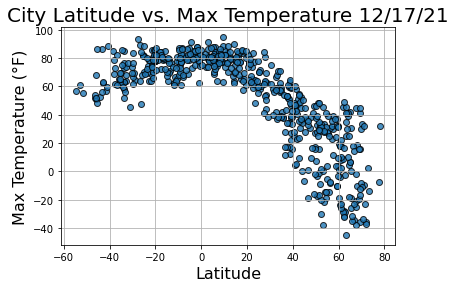

In [44]:
#Time module already imported above

#Build the scatter plot for latitude vs max temperature
plt.scatter(lats, 
            max_temps,
            edgecolor = "k",linewidth=1,marker = "o",
            alpha = 0.8, label = "Cities")

#Other graph properties
today = time.time()
today = time.strftime('%x')
plt.xlabel("Latitude",fontsize = 16)
plt.ylabel("Max Temperature (°F)",fontsize = 16)
plt.title("City Latitude vs. Max Temperature " + today, fontsize = 20)
plt.grid()

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

## Plot latitude vs humidity

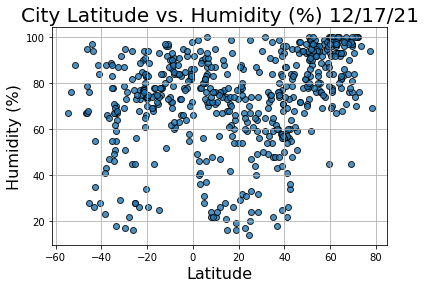

In [50]:
#Build the scatter plot for latitude vs humidity
plt.scatter(lats, 
            humidity,
            edgecolor = "k",linewidth=1,marker = "o",
            alpha = 0.8, label = "Cities")

#Other graph properties

plt.xlabel("Latitude",fontsize = 16)
plt.ylabel("Humidity (%)",fontsize = 16)
plt.title("City Latitude vs. Humidity (%) " + today, fontsize = 20)
plt.grid()

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

## Plot latitude vs Cloudiness

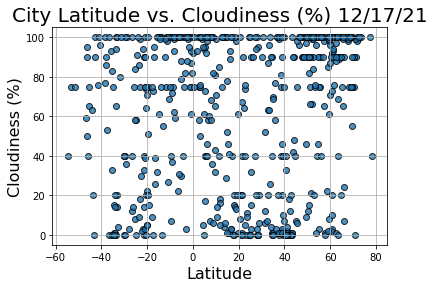

In [49]:
#Build the scatter plot for latitude vs cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor = "k",linewidth=1,marker = "o",
            alpha = 0.8, label = "Cities")

#Other graph properties

plt.xlabel("Latitude",fontsize = 16)
plt.ylabel("Cloudiness (%)",fontsize = 16)
plt.title("City Latitude vs. Cloudiness (%) " + today, fontsize = 20)
plt.grid()

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

## Plot latitude vs Wind Speed

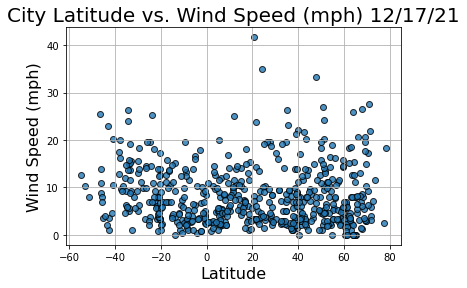

In [53]:
#Build the scatter plot for latitude vs wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor = "k",linewidth=1,marker = "o",
            alpha = 0.8, label = "Cities")

#Other graph properties

plt.xlabel("Latitude",fontsize = 16)
plt.ylabel("Wind Speed (mph)",fontsize = 16)
plt.title("City Latitude vs. Wind Speed (mph) " + today, fontsize = 20)
plt.grid()

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()